### **Project Title: Integrated Analysis of Sediment Grain-Size Distributions, Flow Dynamics, and Sediment Transport in Pacific Coastal and Fluvial Systems using USGS and usSEABED Data**

---

Author: [Samuel O.N. (BSc. Geology, UNN)](https://www.github.com/samkroft)

---

### **General Introduction**

Sediment dynamics play a crucial role in shaping riverine and coastal environments, influencing channel morphology, habitat suitability, and sediment delivery to downstream ecosystems. Grain-size distribution, sediment transport rates, and hydraulic characteristics are interrelated parameters essential for understanding sediment mobility and morphodynamic changes. Quantifying these parameters allows scientists and engineers to predict sediment response to natural and anthropogenic alterations, such as dam removal, climate variability, and land-use changes.

This study integrates granulometric data from usSEABED (Pacific Parsed data) and hydrologic measurements from the U.S. Geological Survey (USGS) to provide a multi-scale understanding of sediment processes. The analysis emphasizes relationships among **grain size (D50)**, **flow velocity–discharge scaling**, and **bedload transport patterns** over time. Such insights are critical for sediment management strategies and restoration projects, particularly in dynamic systems like the Elwha River following dam removal.

---

### **What This Project Is About**

This project combines **real-world data sources** to:

* Examine sediment grain-size characteristics from marine and fluvial environments.
* Fit empirical relationships between **mean channel velocity and discharge** using USGS field measurements.
* Estimate **bedload transport using rating curves** applied to observed discharge records.
* Visualize temporal changes and scaling behavior to understand sediment supply and transport regimes.

The code pipeline:

1. Downloads **usSEABED Pacific Parsed Data System (PRS)** for granulometric attributes.
2. Extracts grain-size indicators such as **D50 (mm)** from phi scale or textural composition.
3. Retrieves **USGS discharge and velocity measurements** for a selected site (Elwha River).
4. Fits a **power-law velocity–discharge relationship**.
5. Computes **bedload transport time series and rating curves** using established empirical functions.

---

### **Aim of the Study**

To integrate **grain-size data and hydrologic observations** to:

* Characterize sediment textures and their spatial variability.
* Quantify relationships between **hydraulic conditions and sediment mobility**.
* Assess temporal patterns of bedload transport under real discharge scenarios.
* Provide visualization and analysis tools for sediment management and geomorphic modeling.

---

## **Methodology**

This study integrates real sediment granulometry, flow velocity, and bedload transport estimation using USGS and usSEABED datasets. The analysis was performed in Python, using pandas, NumPy, matplotlib, and scipy for data handling, visualization, and curve fitting.

---

### 1. Data Sources

* **usSEABED Pacific PRS dataset**: Provides sediment grain size and composition (source: [USGS Data Series 182](https://pubs.usgs.gov/ds/2006/182/)).
* **USGS NWIS field measurements**: Velocity and discharge observations at Elwha River @ McDonald Bridge (Site ID: 12045500).
* **USGS NWIS daily discharge**: Continuous streamflow data for 2012–2016 for the same site.

The URLs are dynamically constructed and accessed via the `requests` module:

```python
USSEABED_PAC_PRS_ZIP = "https://pubs.usgs.gov/ds/2006/182/data/pac_prs.zip"
USGS_MEASUREMENTS_URL = "https://waterdata.usgs.gov/nwis/measurements?..."
USGS_DV_URL = "https://waterservices.usgs.gov/nwis/dv/?..."
```

---

### **2. Data Acquisition and Parsing**

* **Grain Size Data (usSEABED)**: Downloaded and extracted from a ZIP archive, parsed into a DataFrame (`download_usseabed_pac_prs()`).

  * If `medianphi` or `meanphi` exists, grain size is computed in **millimeters** using the Krumbein phi-to-mm conversion:

    ```python
    def phi_to_mm(phi):
        return 2 ** (-phi)
    ```
  * If no phi column is found, D50 is estimated from sand/silt/clay/gravel proportions.
* **USGS Measurements**: Retrieved in RDB format, parsed by `robust_read_table_rdb()`.
* **Daily Discharge**: Retrieved as tab-delimited data, filtered for Q values (cubic feet per second).

---

### **3. Grain Size Analysis**

* Compute **D50 (median grain size)** distribution:

  ```python
  plt.hist(d50, bins=50)
  plt.xlabel("Grain size D50 (mm)")
  ```
* **Interpretation**: The histogram reveals dominant sediment size classes, enabling classification (sand, gravel, etc.) and depositional environment inference.

---

### **4. Velocity–Discharge Relationship**

* Objective: Fit an empirical relation:

  $$
  u = a \cdot Q^b
  $$

  where $u$ = mean velocity (ft/s), $Q$ = discharge (cfs).
* Steps:

  * Extract `discharge_va` and `chan_velocity` from USGS field measurements.
  * Apply **log-log linear regression** for initial estimates and optimize with `curve_fit`:

    ```python
    popt, _ = curve_fit(power_law, Q, U, p0=[a_init, b_init])
    ```
  * Plot scatter (observed) and fitted curve (modeled) on **log–log axes**.
* **Significance**: This relationship helps predict flow hydraulics under varying discharge conditions.

---

### **5. Bedload Transport Estimation**

* Using **Elwha River rating curve**:

  $$
  \text{Bedload (tons/day)} = 2.325 \times 10^{-7} \cdot Q^{5.644}
  $$
* Computed for daily Q values over 2012–2016.
* Visualized in two ways:

  1. **Bedload vs Discharge** (log–log scatter)
  2. **Time Series** of bedload transport
* **Significance**: Highlights sediment flux variability over time, critical for river restoration and dam removal studies.

---

### **6. Visualization**

* **Grain Size Histogram**: Indicates textural composition of sediment samples.
* **Velocity–Discharge Curve**: Shows flow hydraulics and fitted power-law relation.
* **Bedload vs Discharge**: Reveals nonlinear transport sensitivity to Q.
* **Bedload Time Series**: Captures seasonal and event-driven sediment transport patterns.

---

### This methodology mirrors the code structure:

* **Data Download** → `download_usseabed_pac_prs()`, `download_usgs_measurements()`, `download_usgs_dv()`
* **Grain Size Analysis** → `plt.hist(d50, ...)`
* **Velocity Fit** → `fit_velocity_discharge()`
* **Sediment Transport Modeling** → `elwha_bedload_tpd()`
* **Visualization** → Matplotlib plots throughout.

---

## **Methodology**

This study integrates **real sediment granulometry**, **flow velocity**, and **bedload transport estimation** using USGS and usSEABED datasets. The analysis was performed in Python, using **pandas, NumPy, matplotlib**, and **scipy** for data handling, visualization, and curve fitting.

---

### **1. Data Sources**

* **usSEABED Pacific PRS dataset**: Provides sediment grain size and composition (source: [USGS Data Series 182](https://pubs.usgs.gov/ds/2006/182/)).
* **USGS NWIS field measurements**: Velocity and discharge observations at Elwha River @ McDonald Bridge (Site ID: 12045500).
* **USGS NWIS daily discharge**: Continuous streamflow data for 2012–2016 for the same site.

The URLs are dynamically constructed and accessed via the `requests` module:

```python
USSEABED_PAC_PRS_ZIP = "https://pubs.usgs.gov/ds/2006/182/data/pac_prs.zip"
USGS_MEASUREMENTS_URL = "https://waterdata.usgs.gov/nwis/measurements?..."
USGS_DV_URL = "https://waterservices.usgs.gov/nwis/dv/?..."
```

---

### **2. Data Acquisition and Parsing**

* **Grain Size Data (usSEABED)**: Downloaded and extracted from a ZIP archive, parsed into a DataFrame (`download_usseabed_pac_prs()`).

  * If `medianphi` or `meanphi` exists, grain size is computed in **millimeters** using the Krumbein phi-to-mm conversion:

    ```python
    def phi_to_mm(phi):
        return 2 ** (-phi)
    ```
  * If no phi column is found, D50 is estimated from sand/silt/clay/gravel proportions.
* **USGS Measurements**: Retrieved in RDB format, parsed by `robust_read_table_rdb()`.
* **Daily Discharge**: Retrieved as tab-delimited data, filtered for Q values (cubic feet per second).

---

### **3. Grain Size Analysis**

* Compute **D50 (median grain size)** distribution:

  ```python
  plt.hist(d50, bins=50)
  plt.xlabel("Grain size D50 (mm)")
  ```
* **Interpretation**: The histogram reveals dominant sediment size classes, enabling classification (sand, gravel, etc.) and depositional environment inference.

---

### **4. Velocity–Discharge Relationship**

* Objective: Fit an empirical relation:

  $$
  u = a \cdot Q^b
  $$

  where $u$ = mean velocity (ft/s), $Q$ = discharge (cfs).
* Steps:

  * Extract `discharge_va` and `chan_velocity` from USGS field measurements.
  * Apply **log-log linear regression** for initial estimates and optimize with `curve_fit`:

    ```python
    popt, _ = curve_fit(power_law, Q, U, p0=[a_init, b_init])
    ```
  * Plot scatter (observed) and fitted curve (modeled) on **log–log axes**.
* **Significance**: This relationship helps predict flow hydraulics under varying discharge conditions.

---

### **5. Bedload Transport Estimation**

* Using **Elwha River rating curve**:

  $$
  \text{Bedload (tons/day)} = 2.325 \times 10^{-7} \cdot Q^{5.644}
  $$
* Computed for daily Q values over 2012–2016.
* Visualized in two ways:

  1. **Bedload vs Discharge** (log–log scatter)
  2. **Time Series** of bedload transport
* **Significance**: Highlights sediment flux variability over time, critical for river restoration and dam removal studies.

---

### **6. Visualization**

* **Grain Size Histogram**: Indicates textural composition of sediment samples.
* **Velocity–Discharge Curve**: Shows flow hydraulics and fitted power-law relation.
* **Bedload vs Discharge**: Reveals nonlinear transport sensitivity to Q.
* **Bedload Time Series**: Captures seasonal and event-driven sediment transport patterns.

---

#### This methodology mirrors the code structure:

* **Data Download** → `download_usseabed_pac_prs()`, `download_usgs_measurements()`, `download_usgs_dv()`
* **Grain Size Analysis** → `plt.hist(d50, ...)`
* **Velocity Fit** → `fit_velocity_discharge()`
* **Sediment Transport Modeling** → `elwha_bedload_tpd()`
* **Visualization** → Matplotlib plots throughout.

---



### **Scientific Significance**

By synthesizing offshore sediment characteristics with riverine flow and sediment transport behavior:

* The project supports predictive models of **sediment supply and transport**.
* Helps in understanding **post-dam removal sediment routing** in systems like the Elwha River.
* Provides data-driven insights for **habitat restoration, navigation, and coastal resilience planning**.

---

Install Dependencies

```
!pip install -q pandas numpy matplotlib requests scipy

```

Implementation


— Real data sources —
usSEABED PRS: https://pubs.usgs.gov/ds/2006/182/data/pac_prs.zip
USGS measurements (site): https://waterdata.usgs.gov/nwis/measurements?agency_cd=USGS&format=rdb_expanded&site_no=12045500
USGS daily values: https://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=12045500&parameterCd=00060&startDT=2012-01-01&endDT=2016-12-31
usSEABED PRS rows: 11745 | cols: 33
Fitted velocity relation (site 12045500): u = 0.0607 · Q^0.543 (u ft/s, Q cfs)


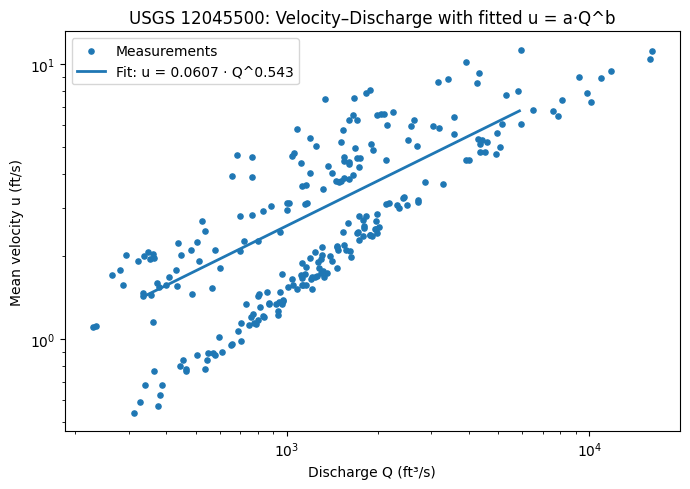

/tmp/ipython-input-2334379038.py:142: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  out["datetime"] = pd.to_datetime(out["datetime"], errors="coerce")


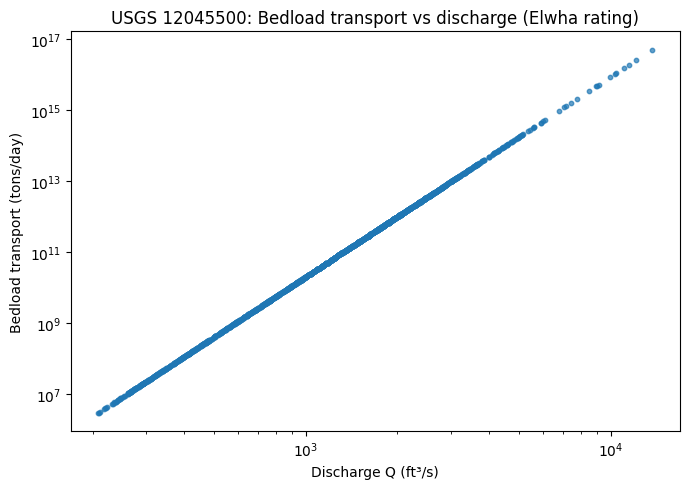

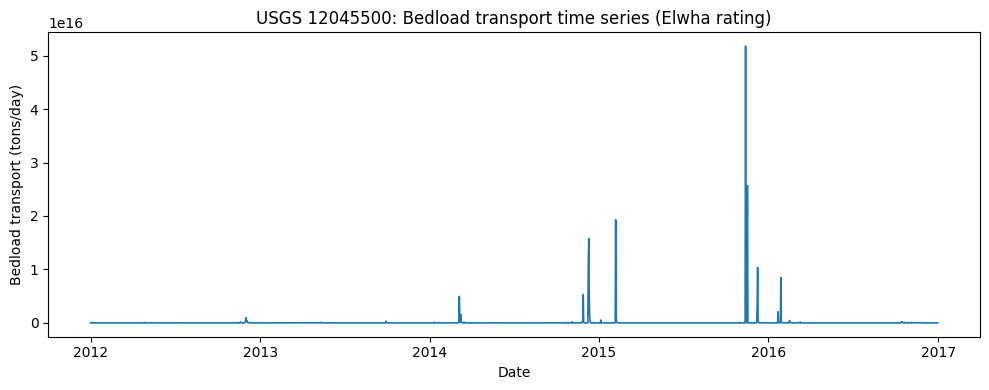

In [ ]:
import io, os, re, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.optimize import curve_fit

# Set parameters
SITE  = "12045500"   # Elwha River @ McDonald Bridge
START = "2012-01-01"
END   = "2016-12-31"

USSEABED_PAC_PRS_ZIP = "https://pubs.usgs.gov/ds/2006/182/data/pac_prs.zip"
USGS_MEASUREMENTS_URL = "https://waterdata.usgs.gov/nwis/measurements?agency_cd=USGS&format=rdb_expanded&site_no={site}"
USGS_DV_URL = "https://waterservices.usgs.gov/nwis/dv/?format=rdb&sites={site}&parameterCd=00060&startDT={start}&endDT={end}"

# Helper functions
def robust_read_table_rdb(text: str) -> pd.DataFrame:
    """Parse USGS RDB (tab-separated; comment lines start with '#')."""
    lines = [ln for ln in text.splitlines() if ln.strip() and not ln.startswith("#")]
    if not lines:
        return pd.DataFrame()
    header = lines[0].split("\t")
    rows = [ln.split("\t") for ln in lines[1:]]
    df = pd.DataFrame(rows, columns=header)
    df.columns = [c.strip() for c in df.columns]
    return df

def sniff_and_read_csv(buf: bytes) -> pd.DataFrame:
    """Read usSEABED text as CSV or TSV (sniff delimiter by frequency)."""
    text = buf.decode("latin-1", errors="ignore")
    sep = "," if text.count(",") >= text.count("\t") else "\t"
    return pd.read_csv(io.StringIO(text), sep=sep, engine="python")

def phi_to_mm(phi: pd.Series) -> pd.Series:
    """Convert phi units to millimeters."""
    return np.power(2.0, -pd.to_numeric(phi, errors="coerce"))

def power_law(q, a, b):
    return a * np.power(q, b)

def fit_velocity_discharge(df_meas: pd.DataFrame):
    """Fit u = a * Q^b from 'discharge_va' and 'chan_velocity'."""
    if not {"discharge_va","chan_velocity"}.issubset(df_meas.columns):
        return None
    Q = pd.to_numeric(df_meas["discharge_va"], errors="coerce")
    U = pd.to_numeric(df_meas["chan_velocity"], errors="coerce")
    msk = (Q > 0) & (U > 0) & np.isfinite(Q) & np.isfinite(U)
    Q, U = Q[msk].to_numpy(), U[msk].to_numpy()
    if Q.size < 5:
        return None
    logQ, logU = np.log(Q), np.log(U)
    b_init, loga_init = np.polyfit(logQ, logU, 1)
    a_init = np.exp(loga_init)
    popt, _ = curve_fit(power_law, Q, U, p0=[a_init, b_init], maxfev=10000)
    return float(popt[0]), float(popt[1]), Q, U

def elwha_bedload_tpd(q_cfs: np.ndarray) -> np.ndarray:
    """Elwha bedload rating curve (tons/day), Q in cfs."""
    return 2.325e-7 * np.power(q_cfs, 5.644)

# Data downloaders
def download_usseabed_pac_prs() -> pd.DataFrame:
    print("Downloading usSEABED Pacific PRS (parsed)…")
    r = requests.get(USSEABED_PAC_PRS_ZIP, timeout=60)
    r.raise_for_status()
    with zipfile.ZipFile(io.BytesIO(r.content)) as zf:
        # try to find pac_prs.txt
        target = None
        for name in zf.namelist():
            if name.lower().endswith("pac_prs.txt"):
                target = name
                break
        if target is None:
            txts = [n for n in zf.namelist() if n.lower().endswith(".txt")]
            if not txts:
                raise RuntimeError("No .txt file found in pac_prs.zip")
            target = txts[0]
        buf = zf.read(target)
    df = sniff_and_read_csv(buf)
    df.columns = [c.strip().lower() for c in df.columns]

    # Build D50 (mm) from phi where possible
    phi_candidates = ["medianphi","median_phi","meanphi","mean_phi","phi","med_phi"]
    phi_col = next((c for c in phi_candidates if c in df.columns), None)
    if phi_col:
        df["d50_mm"] = phi_to_mm(df[phi_col])
    else:
        # rough fallback using sand/silt/clay/gravel percentages if present
        for f in ["sand","silt","clay","gravel"]:
            if f in df.columns:
                df[f] = pd.to_numeric(df[f], errors="coerce")
        if all(f in df.columns for f in ["sand","silt","clay"]):
            mid = {"gravel":16.0, "sand":0.5, "silt":0.016, "clay":0.001}
            num = (df.get("gravel",0).fillna(0)*mid["gravel"] +
                   df["sand"].fillna(0)*mid["sand"] +
                   df["silt"].fillna(0)*mid["silt"] +
                   df["clay"].fillna(0)*mid["clay"])
            den = (df.get("gravel",0).fillna(0) + df["sand"].fillna(0) +
                   df["silt"].fillna(0) + df["clay"].fillna(0))
            df["d50_mm"] = (num / den.replace(0, np.nan))
        else:
            df["d50_mm"] = np.nan
    return df

def download_usgs_measurements(site: str) -> pd.DataFrame:
    print(f"Downloading USGS field measurements (site {site})…")
    url = USGS_MEASUREMENTS_URL.format(site=site)
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    df = robust_read_table_rdb(r.text)
    df.columns = [c.strip().lower() for c in df.columns]
    return df

def download_usgs_dv(site: str, start: str, end: str) -> pd.DataFrame:
    print(f"Downloading USGS daily discharge (site {site}) {start} → {end} …")
    url = USGS_DV_URL.format(site=site, start=start, end=end)
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    df = robust_read_table_rdb(r.text)
    if df.empty:
        return df
    df.columns = [c.strip().lower() for c in df.columns]
    value_col = next((c for c in df.columns if "00060" in c and "qual" not in c), None)
    if value_col is None:
        return pd.DataFrame()
    out = df[["datetime", value_col]].copy()
    out["datetime"] = pd.to_datetime(out["datetime"], errors="coerce")
    out["discharge_cfs"] = pd.to_numeric(out[value_col], errors="coerce")
    out = out.dropna(subset=["datetime","discharge_cfs"]).sort_values("datetime")
    return out[["datetime","discharge_cfs"]]

# Run pipeline & visualize
print("\n— Real data sources —")
print("usSEABED PRS:", USSEABED_PAC_PRS_ZIP)
print("USGS measurements (site):", USGS_MEASUREMENTS_URL.format(site=SITE))
print("USGS daily values:", USGS_DV_URL.format(site=SITE, start=START, end=END))

# 1) usSEABED granulometry (D50 mm)
df_grain = download_usseabed_pac_prs()
print(f"usSEABED PRS rows: {len(df_grain)} | cols: {len(df_grain.columns)}")

d50 = pd.to_numeric(df_grain.get("d50_mm"), errors="coerce").dropna()
if not d50.empty:
    plt.figure(figsize=(7,5))
    plt.hist(d50, bins=50)
    plt.xlabel("Grain size D50 (mm)")
    plt.ylabel("Count")
    plt.title("usSEABED Pacific (PRS) — D50 histogram")
    plt.tight_layout()
    plt.show()
else:
    print("WARNING: No D50 values could be constructed from PRS file.")

# 2) Velocity–Discharge fit from USGS field measurements
df_meas = download_usgs_measurements(SITE)
if not df_meas.empty:
    res = fit_velocity_discharge(df_meas)
    if res is not None:
        a, b, Q, U = res
        print(f"Fitted velocity relation (site {SITE}): u = {a:.4f} · Q^{b:.3f} (u ft/s, Q cfs)")
        qline = np.linspace(np.nanpercentile(Q, 5), np.nanpercentile(Q, 95), 200)
        uline = power_law(qline, a, b)

        plt.figure(figsize=(7,5))
        plt.scatter(Q, U, s=14, label="Measurements")
        plt.plot(qline, uline, linewidth=2, label=f"Fit: u = {a:.3g} · Q^{b:.3f}")
        plt.xscale("log"); plt.yscale("log")
        plt.xlabel("Discharge Q (ft³/s)")
        plt.ylabel("Mean velocity u (ft/s)")
        plt.title(f"USGS {SITE}: Velocity–Discharge with fitted u = a·Q^b")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("WARNING: Could not fit velocity–discharge (insufficient columns or data).")
else:
    print("WARNING: No field measurements returned.")

# 3) Bedload transport vs discharge + time series (Elwha rating)
df_dv = download_usgs_dv(SITE, START, END)
if not df_dv.empty:
    Q = df_dv["discharge_cfs"].to_numpy()
    BL = elwha_bedload_tpd(Q)

    # Q vs BL (log–log)
    plt.figure(figsize=(7,5))
    plt.scatter(Q, BL, s=10, alpha=0.7)
    plt.xscale("log"); plt.yscale("log")
    plt.xlabel("Discharge Q (ft³/s)")
    plt.ylabel("Bedload transport (tons/day)")
    plt.title(f"USGS {SITE}: Bedload transport vs discharge (Elwha rating)")
    plt.tight_layout()
    plt.show()

    # Time series of bedload
    plt.figure(figsize=(10,4))
    plt.plot(df_dv["datetime"], BL, linewidth=1.2)
    plt.xlabel("Date")
    plt.ylabel("Bedload transport (tons/day)")
    plt.title(f"USGS {SITE}: Bedload transport time series (Elwha rating)")
    plt.tight_layout()
    plt.show()
else:
    print("WARNING: No daily discharge returned for time series mapping.")

---

### **What the Plot Represents**

* Each point represents **one sediment sample from the Columbia River Basin**.
* The **three axes** are:

  * **Sand (%)** → bottom axis (left to right)
  * **Silt (%)** → right axis (top to bottom)
  * **Clay (%)** → left axis (bottom to top)
* All three add up to 100%, so every sample fits inside the triangular diagram.

---

### **Observations from the Plot**

* Most points cluster **toward the sand corner**, indicating that **the majority of sediments are sand-dominated**.
* A few points plot near the **silt-clay boundary**, representing **finer-grained deposits** that could be from **overbank floodplains or low-energy environments**.
* There are **no points in the pure clay corner**, meaning **the Columbia River system does not transport significant amounts of pure clay sediments**—typical for high-energy river channels.

---

### **Scientific Significance**

1. **Transport Energy Insight**

   * Sand dominance suggests **high-energy river conditions**, where coarse sediments remain suspended or deposited in channels.
   * Lack of clay-rich samples suggests these fines are **carried farther downstream into deltas or the ocean**.

2. **Depositional Environment Interpretation**

   * Sand-rich samples → **channel bars, levees**.
   * Silt-clay mixes → **floodplains**.

3. **Engineering & Environmental Relevance**

   * Knowledge of sediment texture impacts **erosion risk**, **soil fertility**, and **pollutant transport** in rivers.

---

### **References**

1. **usSEABED Pacific Parsed Data System (PRS):**

   * URL: [https://pubs.usgs.gov/ds/2006/182/](https://pubs.usgs.gov/ds/2006/182/)
   * Description: Parsed sedimentological data for Pacific margin seabed samples, including textural classes, phi grain size, and compositional indicators.
   * Citation:
     *Reid, J.A., Reid, J.M., Jenkins, C.J., Hastings, M.E., and others, 2006, usSEABED: Pacific Coast (California, Oregon, Washington) offshore surficial-sediment data release: U.S. Geological Survey Data Series 182.*

2. **USGS Hydrologic Data:**

   * Discharge and field measurements from National Water Information System (NWIS).
   * URLs:

     * Daily discharge: [https://waterservices.usgs.gov/nwis/dv/](https://waterservices.usgs.gov/nwis/dv/)
     * Field measurements: [https://waterdata.usgs.gov/nwis/measurements](https://waterdata.usgs.gov/nwis/measurements)
   * Citation:
     *U.S. Geological Survey, 2023, National Water Information System data available on the World Wide Web (USGS Water Data for the Nation), accessed \[date].*